# Preliminary Data Analysis 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
import numpy as np

sns.set()  # Aesthetic plots

## Proportion of Recordings with Bird Sounds in each Dataset

The plot is also saved to `proportion.png`

In [2]:
birdvox = np.genfromtxt("../data/bird-audio-detection/birdvox-labels.csv", delimiter=",", skip_header=1, dtype=int)
warblr = np.genfromtxt("../data/bird-audio-detection/warblr-labels.csv", delimiter=",",   skip_header=1, dtype=int)
ff1010 = np.genfromtxt("../data/bird-audio-detection/ff1010-labels.csv", delimiter=",",   skip_header=1, dtype=int)

[0.2516254876462939, 0.755625, 0.50085]


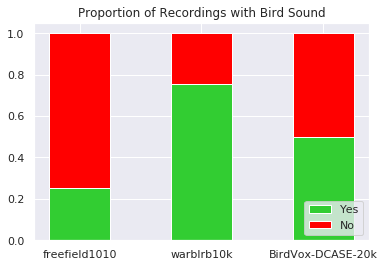

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 13}
matplotlib.rc('font', **font)


labels = "freefield1010", "warblrb10k",  "BirdVox-DCASE-20k"
datasets= [ff1010, warblr, birdvox]
yes = [np.sum(x[:,-1]) / len(x[:,-1]) for x in datasets]
print(yes)
no = [1 - x for x in yes]
plt.bar(labels, yes, color="limegreen", width=0.5, label="Yes")
plt.bar(labels, no, bottom=yes, color="red", width=0.5, label="No")
plt.legend(loc = "lower right")
plt.title("Proportion of Recordings with Bird Sound")
plt.savefig("proportion.png")
plt.show()

## File Sizes in each Dataset

The plots are saved to `file_sizes.png`

In [4]:
"""Get a list of file sizes for each dataset."""
SIZES = {}

def get_sizes(path_str):
    path = pathlib.Path(path_str)
    sizes = []
    for file in os.listdir(path):
        sizes.append(os.path.getsize(path / pathlib.Path(file)) // 1000)
    return sizes

SIZES["freefield1010"] = get_sizes("../data/bird-audio-detection/ff1010-wav/")
SIZES["warblrb10k"] = get_sizes("../data/bird-audio-detection/warblr-wav/")
SIZES["BirdVox-DCASE20k"] = get_sizes("../data/bird-audio-detection/birdvox-wav/")

===== freefield1010 =====
Min File Size: 882
Max File Size: 882
Mean: 882.0
===== warblrb10k =====
Min File Size: 84
Max File Size: 4270
Mean: 888.571125
===== BirdVox-DCASE20k =====
Min File Size: 882
Max File Size: 882
Mean: 882.0


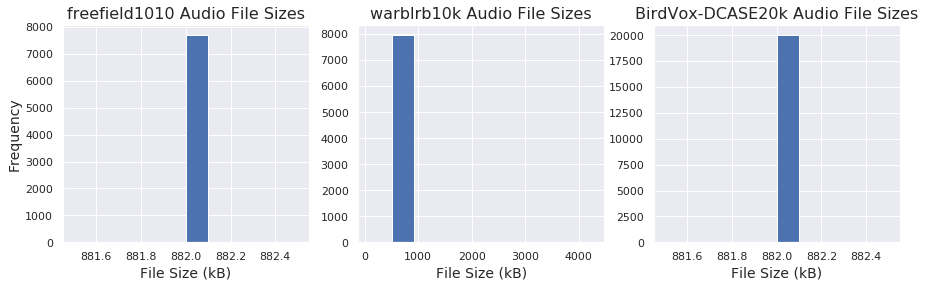

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

for idx, name in enumerate(SIZES):
    a = ax[idx]
    a.hist(SIZES[name])
    a.set_xlabel("File Size (kB)", size=14)
    if idx == 0: a.set_ylabel("Frequency", size=14)
    a.set_title(f"{name} Audio File Sizes", size=16)
    
    print(f"===== {name} =====")
    print(f"Min File Size: {min(SIZES[name])}")
    print(f"Max File Size: {max(SIZES[name])}")
    print(f"Mean: {sum(SIZES[name])/len(SIZES[name])}")

fig.savefig("file_sizes.png")